<a href="https://colab.research.google.com/github/ujinee52/AI_bootcamp_sc2PJ/blob/main/Section_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#문제 정의

따릉이는 서울특별시에서 운영하는 공공자전거 서비스이다.

**문제** : 자치구 및 사용 지역에 따른 유연한 공공자전거 배치 필요성 및 자전거 수리 필요

코로나 확진자 수에 따른 따릉이 대여건수를 예측해보고, 확진자 수에 따라 영향을 받는다면 매일 확진자수는 실시간으로 집계되고, 전날 하루의 통계치가 매 12시 정각에 발표되니 다음날 따릉이 대여건수를 예측하여 유연하게 대여소와 자전거 고치는 시기를 조정하여 운영할 수 있을 것으로 예상된다.

=> 사용한 데이터셋 [ 출처 : 서울 열린데이터 광장 ]


*   서울특별시 공공자전거 이용정보(시간대별) / 2020년 7-11월
*   서울특별시 공공자전거 대여소 정보
*   서울특별시 코로나19 자치구별 확진자 발생동향
*   서울특별시 코로나19 확진자 발생동향



#분류? 회귀?
회귀 문제로 접근했다. 

확진자와 다른 요소들에 따른 대여건수 즉, 숫자 예측이기 때문에 회귀 문제로 접근하는 것이 맞다고 생각함.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

2021년 따릉이 대여 데이터가 많지 않고, 백신접종 및 코로나 위협에 대한 인식도 많이 저하된 추세이므로 최대한 영향 받는 요소를 줄이기 위해 2020년 7-11월 데이터 이용

In [ ]:
#따릉이 데이터 전처리

import pandas as pd

#pd.read_csv로 csv파일 불러오기
df7 = pd.read_csv("/content/drive/MyDrive/ai_04/공공자전거 이용정보(시간대별)_20.07.csv",encoding='cp949')
df8 = pd.read_csv("/content/drive/MyDrive/ai_04/공공자전거 이용정보(시간대별)_20.09.csv",encoding='cp949')
df10 = pd.read_csv("/content/drive/MyDrive/ai_04/공공자전거 이용정보(시간대별)_20.08.csv",encoding='cp949')
df9 = pd.read_csv("/content/drive/MyDrive/ai_04/공공자전거 이용정보(시간대별)_20.10.csv",encoding='cp949')
df11 = pd.read_csv("/content/drive/MyDrive/ai_04/공공자전거 이용정보(시간대별)_20.11.csv",encoding='cp949')
df7.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-07-01,0,740,740. 으뜸공원,정기권,NaN,~10대,1,13.97,0.10,440.87,5
1,2020-07-01,0,939,939. 은평구청 교차로,정기권,NaN,~10대,1,0.00,0.00,0.00,20
2,2020-07-01,0,1026,1026. 대명초교 입구 교차로,정기권,NaN,~10대,1,0.00,0.00,0.00,21
3,2020-07-01,0,1044,1044. 굽은다리역,정기권,NaN,~10대,3,52.53,0.31,1326.42,24
4,2020-07-01,0,1721,1721. 창동역 2번출구,정기권,NaN,~10대,2,62.37,0.49,2100.00,60


In [ ]:
df7.tail()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
2053995,2020-07-31,23,1985,1985. 구로도서관,단체권,NaN,30대,2,0.00,0.00,0.0,120
2053996,2020-07-31,23,810,810. 이태원지하보도,단체권,F,20대,3,8.98,0.10,420.0,28
2053997,2020-07-31,23,1044,1044. 굽은다리역,단체권,M,~10대,2,0.00,0.00,0.0,39
2053998,2020-07-31,23,1814,1814. 두산위브아파트 옆 상가건물 앞,단체권,M,~10대,3,297.78,2.10,9060.0,100
2053999,2020-07-31,23,212,212. 여의도역 1번출구 옆,단체권,M,30대,2,36.81,0.33,1430.0,23


따릉이 최소 이용 건수와 서울시 코로나 확진자 추이를 비교해 보았을 때, 확진자 수와 이용 건수가 대체로 반비례하여 나타남 

In [ ]:
#한 번 이상 따릉이를 이용한 최소 이용 건수의 데이터

print("7월 이용자 데이터 : ",df7.shape,
      "\n8월 이용자 데이터 : ",df8.shape,
      "\n9월 이용자 데이터 : ",df9.shape,
      "\n10월 이용자 데이터 : ",df10.shape,
      "\n11월 이용자 데이터 : ",df11.shape)

7월 이용자 데이터 :  (2054000, 12) 
8월 이용자 데이터 :  (1445994, 12) 
9월 이용자 데이터 :  (2202088, 12) 
10월 이용자 데이터 :  (2332766, 12) 
11월 이용자 데이터 :  (1679828, 12)


In [ ]:
#7-11월 데이터셋 concat(합치기)
df = pd.concat([df7,df8,df9,df10,df11])
df.shape

(9714676, 12)

In [ ]:
#데이터 전체의 절반 정도가 성별 정보가 없다는 것을 알 수 있음
#데이터가 너무 커서 전처리할 때에도 시간이 오래걸리기 때문에 결측치는 삭제
#실제로 아래 데이터를 가지고 비교해봤을 때 비율의 차이 자체는 크게 영향 없었음

#df.isnull().sum()     #성별        4573193
df.dropna(how='any',inplace=True)   #.shape    (5141483, 12)

# 전처리

##따릉이 데이터 살펴보기

##데이터 설명 
*   대여 시간 : 몇시에 빌렸는가
*   사용 시간 : 얼마나 사용했는가
*   이용 건수 : 몇번을 사용했는가


In [ ]:
df.dtypes

대여일자        object
대여소번호        int64
대여소         object
대여구분코드      object
성별          object
연령대코드       object
이용건수         int64
운동량         object
탄소량         object
이동거리(M)    float64
이용시간(분)    float64
dtype: object

In [ ]:
pb['연령대코드'].value_counts()

20대     2052058
30대     1300800
40대      832954
50대      489615
~10대     307127
60대      131289
70대~      27640
Name: 연령대코드, dtype: int64

<function matplotlib.pyplot.show>

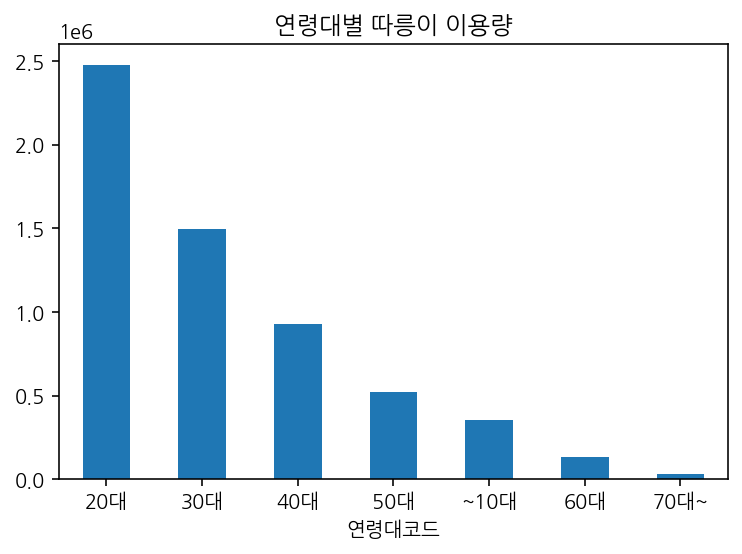

In [ ]:
import matplotlib.pyplot as plt

age = pb.groupby('연령대코드')['이용건수'].sum().sort_values(ascending=False)
age.plot(kind='bar',title="연령대별 따릉이 이용량",rot=0)
plt.show
#20,30,40,50,10대.. 순으로 이용량이 많다는 것을 알 수 있음

In [ ]:
#10대가 평균적 사용시간은 가장 길었음
pb.groupby('연령대코드')['사용시간'].mean().sort_values(ascending=False)

연령대코드
~10대    37.300052
40대     37.188210
60대     36.600842
20대     35.441673
50대     34.925909
30대     34.806926
70대~    33.572648
Name: 사용시간, dtype: float64

In [ ]:
#가장 많은 시간을 사용한건 20 하지만 이건 이용량의 순에 영향을 많이 받은 것 같음
pb.groupby('연령대코드')['사용시간'].sum().sort_values(ascending=False)

연령대코드
20대     72728369
30대     45276849
40대     30976068
50대     17100249
~10대    11455853
60대      4805288
70대~      927948
Name: 사용시간, dtype: int64

In [ ]:
#정기권으로 이용하는 사람들이 많다. 정기권은 대부분 서울에 사는 사람일 가능성이 큼, 그에 반에 일일권은 지방 사람일 가능성이 큼. 비율이 약 4:1정도
pb.value_counts('대여구분코드')

대여구분코드
정기권         3929943
일일권         1185061
단체권           26392
일일권(비회원)         84
단기권(전기)           3
dtype: int64

In [ ]:
#이후 원핫 인코딩을 조금 더 수월하게 하기 위해 삭제
df.drop(df[df['대여구분코드']=='단기권(전기)'].index, inplace=True)
df.drop(df[df['대여구분코드']=='일일권(비회원)'].index, inplace=True)

##확진자 데이터 살펴보기

In [ ]:
df_gu = pd.read_csv("/content/drive/MyDrive/ai_04/서울특별시 코로나19 자치구별 확진자 발생동향.csv",encoding='cp949')
df_seoul = pd.read_csv("/content/drive/MyDrive/ai_04/서울특별시 코로나19 확진자 발생동향.csv",encoding='cp949')
df_gu.head()

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,광진구 추가,동대문구 전체,동대문구 추가,중랑구 전체,중랑구 추가,성북구 전체,성북구 추가,강북구 전체,강북구 추가,도봉구 전체,도봉구 추가,노원구 전체,노원구 추가,은평구 전체,은평구 추가,서대문구 전체,서대문구 추가,마포구 전체,마포구 추가,양천구 전체,양천구 추가,강서구 전체,강서구 추가,구로구 전체,구로구 추가,금천구 전체,금천구 추가,영등포구 전체,영등포구 추가,동작구 전체,동작구 추가,관악구 전체,관악구 추가,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가,수집일
0,2021.06.23.00,796.0,1.0,718.0,2.0,1334.0,8.0,1333.0,8.0,1600.0,10.0,1781.0,8.0,2116.0,5.0,1988.0,12.0,1382.0,1.0,1470.0,6.0,2208.0,14.0,2049.0,6.0,1201.0,8.0,1543.0,6.0,1675.0,12.0,2303.0,15.0,1590.0,5.0,801.0,1.0,1805.0,11.0,2000.0,9.0,2226.0,21.0,2103.0,13.0,2968.0,27.0,2912.0,7.0,1928.0,11.0,4366.0,9.0,2021-06-23 12:11:40.0
1,2021.06.22.00,795.0,0.0,716.0,0.0,1326.0,5.0,1325.0,3.0,1590.0,5.0,1773.0,3.0,2111.0,4.0,1977.0,8.0,1381.0,5.0,1464.0,1.0,2194.0,1.0,2043.0,3.0,1193.0,1.0,1537.0,4.0,1663.0,8.0,2289.0,6.0,1585.0,2.0,800.0,1.0,1794.0,4.0,1991.0,3.0,2205.0,9.0,2090.0,8.0,2941.0,26.0,2905.0,8.0,1917.0,4.0,4356.0,10.0,2021-06-22 19:11:40.0
2,2021.06.21.00,795.0,0.0,718.0,2.0,1321.0,6.0,1322.0,8.0,1585.0,7.0,1770.0,3.0,2107.0,2.0,1969.0,6.0,1376.0,2.0,1463.0,3.0,2193.0,5.0,2040.0,6.0,1192.0,1.0,1533.0,4.0,1654.0,6.0,2283.0,3.0,1583.0,9.0,799.0,2.0,1790.0,5.0,1988.0,6.0,2196.0,6.0,2082.0,7.0,2915.0,21.0,2897.0,7.0,1913.0,2.0,4345.0,5.0,2021-06-21 19:11:40.0
3,2021.06.20.00,794.0,3.0,717.0,2.0,1309.0,9.0,1305.0,6.0,1568.0,8.0,1764.0,6.0,2098.0,9.0,1960.0,5.0,1370.0,2.0,1458.0,2.0,2186.0,10.0,2031.0,8.0,1188.0,3.0,1518.0,7.0,1644.0,7.0,2276.0,7.0,1569.0,8.0,790.0,6.0,1774.0,22.0,1971.0,9.0,2186.0,4.0,2061.0,8.0,2867.0,18.0,2884.0,17.0,1909.0,2.0,4333.0,9.0,2021-06-20 19:11:40.0
4,2021.06.19.00,794.0,3.0,717.0,2.0,1309.0,9.0,1305.0,6.0,1568.0,8.0,1764.0,6.0,2098.0,9.0,1960.0,5.0,1370.0,2.0,1458.0,2.0,2186.0,10.0,2031.0,8.0,1188.0,3.0,1518.0,7.0,1644.0,7.0,2276.0,7.0,1569.0,8.0,790.0,6.0,1774.0,22.0,1971.0,9.0,2186.0,4.0,2061.0,8.0,2867.0,18.0,2884.0,17.0,1909.0,2.0,4333.0,9.0,2021-06-19 19:11:40.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text

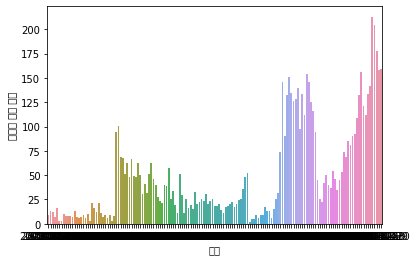

In [ ]:
# 7-11월 확진자 추이

from matplotlib import pyplot as plt
import seaborn as sns

sns.barplot(
    data = df,
    x="날짜",
    y="서울시 추가 확진"
)

In [ ]:
covid19 = pd.read_csv('/content/drive/MyDrive/ai_04/서울특별시 코로나19 확진자 발생동향.csv', encoding='cp949')
covid19 = covid19[['서울시 기준일','서울시 확진자','서울시 추가 확진']]
covid19.head()

,서울시 기준일,서울시 확진자,서울시 추가 확진
0,2021.06.23.00,48196,236
1,2021.06.22.00,47961,132
2,2021.06.21.00,47829,134
3,2021.06.20.00,47695,165
4,2021.06.19.00,47530,197


In [ ]:
covid19.dtypes

서울시 기준일      object
서울시 확진자       int64
서울시 추가 확진     int64
dtype: object

In [ ]:
covid19['날짜'] = pd.to_datetime(covid19['서울시 기준일'])
covid19.head()

,서울시 기준일,서울시 확진자,서울시 추가 확진,날짜
0,2021.06.23.00,48196,236,2021-06-23
1,2021.06.22.00,47961,132,2021-06-22
2,2021.06.21.00,47829,134,2021-06-21
3,2021.06.20.00,47695,165,2021-06-20
4,2021.06.19.00,47530,197,2021-06-19


In [ ]:
#월과 일을 기준으로 따릉이(pb) 데이터에 맞춰 merge => covid19 데이터셋에서 2020.7-2020.11데이터만 골라냄
df = pb.merge(covid19,  how='outer',on=['날짜'])
df.dropna(inplace=True)

print(df.shape) #(5141483, 16)
df.drop(['대여일자','서울시 기준일'],axis=1,inplace=True)
df.head()

(5141483, 16)


,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,날짜,서울시 확진자,서울시 추가 확진
0,0.0,1643.0,1643. 태릉입구역 8번출구,정기권,F,~10대,1.0,0.00,0.00,0.00,12.0,2020-07-01,1321,9
1,0.0,1689.0,1689. 마들역 3번출구,정기권,F,~10대,1.0,0.00,0.00,0.00,6.0,2020-07-01,1321,9
2,0.0,574.0,574. 아차산역4번출구,정기권,F,~10대,1.0,0.00,0.00,0.00,7.0,2020-07-01,1321,9
3,0.0,1127.0,1127. 화곡역(에이스정형외과앞) 버스정류장,정기권,F,~10대,1.0,52.83,0.54,2340.57,16.0,2020-07-01,1321,9
4,0.0,1327.0,1327. 상월곡역 3번출구,정기권,F,~10대,1.0,0.00,0.00,0.00,16.0,2020-07-01,1321,9


# 사용할 데이터 추리기

In [ ]:
cols = ['날짜','요일','소재지(자치구)','대여시간','대여구분코드','서울시 추가 확진']  #'서울시 확진자', 

df_1 = df.groupby(cols)['이용건수'].sum().reset_index()
df_1.head()

,날짜,요일,소재지(자치구),대여시간,대여구분코드,서울시 추가 확진,이용건수
0,2020-07-01,2,강남구,0,일일권,9,3
1,2020-07-01,2,강남구,0,정기권,9,22
2,2020-07-01,2,강남구,1,일일권,9,6
3,2020-07-01,2,강남구,1,정기권,9,20
4,2020-07-01,2,강남구,2,일일권,9,3


원핫인코딩

In [ ]:
df_onehot = pd.get_dummies(data = df_1, columns = ['대여구분코드','요일','소재지(자치구)'], prefix = ['대여구분코드','요일','소재지(자치구)'])
df_onehot.head()

,날짜,대여시간,서울시 추가 확진,이용건수,대여구분코드_단체권,대여구분코드_일일권,대여구분코드_정기권,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6,소재지(자치구)_강남구,소재지(자치구)_강동구,소재지(자치구)_강북구,소재지(자치구)_강서구,소재지(자치구)_관악구,소재지(자치구)_광진구,소재지(자치구)_구로구,소재지(자치구)_금천구,소재지(자치구)_노원구,소재지(자치구)_도봉구,소재지(자치구)_동대문구,소재지(자치구)_동작구,소재지(자치구)_마포구,소재지(자치구)_서대문구,소재지(자치구)_서초구,소재지(자치구)_성동구,소재지(자치구)_성북구,소재지(자치구)_송파구,소재지(자치구)_양천구,소재지(자치구)_영등포구,소재지(자치구)_용산구,소재지(자치구)_은평구,소재지(자치구)_종로구,소재지(자치구)_중구,소재지(자치구)_중랑구
0,2020-07-01,0,9,3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-07-01,0,9,22,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-07-01,1,9,6,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-07-01,1,9,20,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-07-01,2,9,3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 좋은 학습 모델 찾기

어느 모델이 성능이 좋은지 확인하기 위해 모든 데이터를 사용하기에는 너무 많은 시간이 걸림. 

이용건수도 가장 많고, 대여수도 가장 많은 강서구의 데이터로 학습 후, 모든 자치구에 적용할 예정

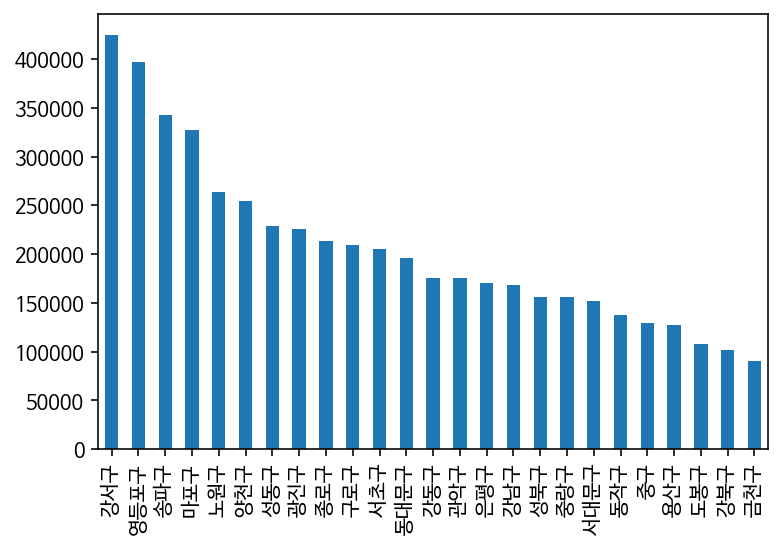

In [ ]:
from matplotlib import pyplot as plt
g = df['소재지(자치구)'].value_counts().sort_values(ascending=False)
g.plot.bar()

In [ ]:
df_gangseo = df_1[df_1['소재지(자치구)']=='강서구']
print(df_gangseo.shape)
df_gangseo.head() #(8031, 7)

(8031, 7)


,날짜,요일,소재지(자치구),대여시간,대여구분코드,서울시 추가 확진,이용건수
148,2020-07-01,2,강서구,0,일일권,9,12
149,2020-07-01,2,강서구,0,정기권,9,46
150,2020-07-01,2,강서구,1,일일권,9,9
151,2020-07-01,2,강서구,1,정기권,9,30
152,2020-07-01,2,강서구,2,정기권,9,12


요일에 따라(특히 주말/평일), 대여구분코드에 따라(정기권, 일일권, 단체권) 영향을 많이 받을 것으로 예상해서 데이터를 추리는 과정에서 넣었고, 카테고리컬 데이터이기 때문에 원핫인코딩을 사용하여 숫자화 시켜주었다

[요일_0 : 월..~]

In [ ]:
df_gangseo_onehot = pd.get_dummies(data = df_gangseo, columns = ['대여구분코드','요일'], prefix = ['대여구분코드','요일'])
print(df_gangseo_onehot.shape)
df_gangseo_onehot.head()

(8031, 15)


,날짜,소재지(자치구),대여시간,서울시 추가 확진,이용건수,대여구분코드_단체권,대여구분코드_일일권,대여구분코드_정기권,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
148,2020-07-01,강서구,0,9,12,0,1,0,0,0,1,0,0,0,0
149,2020-07-01,강서구,0,9,46,0,0,1,0,0,1,0,0,0,0
150,2020-07-01,강서구,1,9,9,0,1,0,0,0,1,0,0,0,0
151,2020-07-01,강서구,1,9,30,0,0,1,0,0,1,0,0,0,0
152,2020-07-01,강서구,2,9,12,0,0,1,0,0,1,0,0,0,0


Train, validation, Test data Split

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_gangseo_onehot, test_size=0.2, random_state=2)
train.shape,test.shape

((6424, 15), (1607, 15))

In [ ]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=2)
train.shape, val.shape,test.shape

((5139, 15), (1285, 15), (1607, 15))

In [ ]:
target = '이용건수'
#날짜와 자치구는 필요없기 때문에 삭제해주었다
features = df_gangseo_onehot.drop(columns=[target,'날짜','소재지(자치구)']).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

## 기준 모델 (Baseline)
기준 모델은 이용건수의 평균으로 하였다. 

확진자 수에 따른 이용건수를 예측하는 것이니 이용 건수의 평균을 기본적인 기준 모델로 설정하는 것이 좋겠다고 생각했다.

In [ ]:
baseline = df_1['이용건수'].mean()
y_base = [baseline] * len(y_train)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train, y_base)
print(f'기준모델 MAE : {mae:.2f}')

기준모델 MAE : 50.98


선형 회귀 모델

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
print(f'훈련 에러: {mae:.2f}')

# 검증 모델 MAE
y_pred_val = lr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred_val)
print(f'검증 에러: {mae:.2f}')

print("훈련 세트 정확도 : ",lr.score(X_train,y_train))
print("검증 세트 정확도 : ",lr.score(X_val,y_val))

훈련 에러: 37.58
검증 에러: 36.23
훈련 세트 정확도 :  0.4491685545301041
검증 세트 정확도 :  0.45040436738693074


XGBoost

In [ ]:
import xgboost

# 객체 생성
xgb_model = xgboost.XGBRegressor(n_estimators=100)

xgb_model.fit(X_train,y_train)
 #0.7534820401567167
print("validation sets accuracy : ",xgb_model.score(X_val,y_val))  #0.7246470352725729
print("train sets accuracy : ",xgb_model.score(X_test,y_test))    #0.7652712147159009

[03:57:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
validation sets accuracy :  0.7246470352725729
train sets accuracy :  0.7652712147159009


XGBoost GridSearchCV

In [ ]:
#boosting모델은 파라미터값에 민감하다. 교차검증을 통해 최적의 파라미터값을 찾아주는 것이 좋다
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, GridSearchCV

xgb_model = xgb.XGBClassifier(n_estimators=100)
params = {"max_depth":[5,7], "gamma":[0,0.5]}
grid = GridSearchCV(xgb_model, cv=3, param_grid=params)
grid.fit(X_train, y_train)
print(grid.best_params_)  #{'gamma': 0, 'max_depth': 5}

XGBoost GridSearchCV를 통해 얻은 최적값으로 모델을 다시 학습

In [ ]:
xgb_model = xgboost.XGBRegressor(n_estimators=100,gamma=0, max_depth=5)

xgb_model.fit(X_train,y_train)
print("validation sets accuracy : ",xgb_model.score(X_val,y_val))  #0.8384254691314535
print("test sets accuracy : ",xgb_model.score(X_test,y_test))  #0.8767396152840573

[03:57:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
validation sets accuracy :  0.8384254691314535
test sets accuracy :  0.8767396152840573


특성중요도

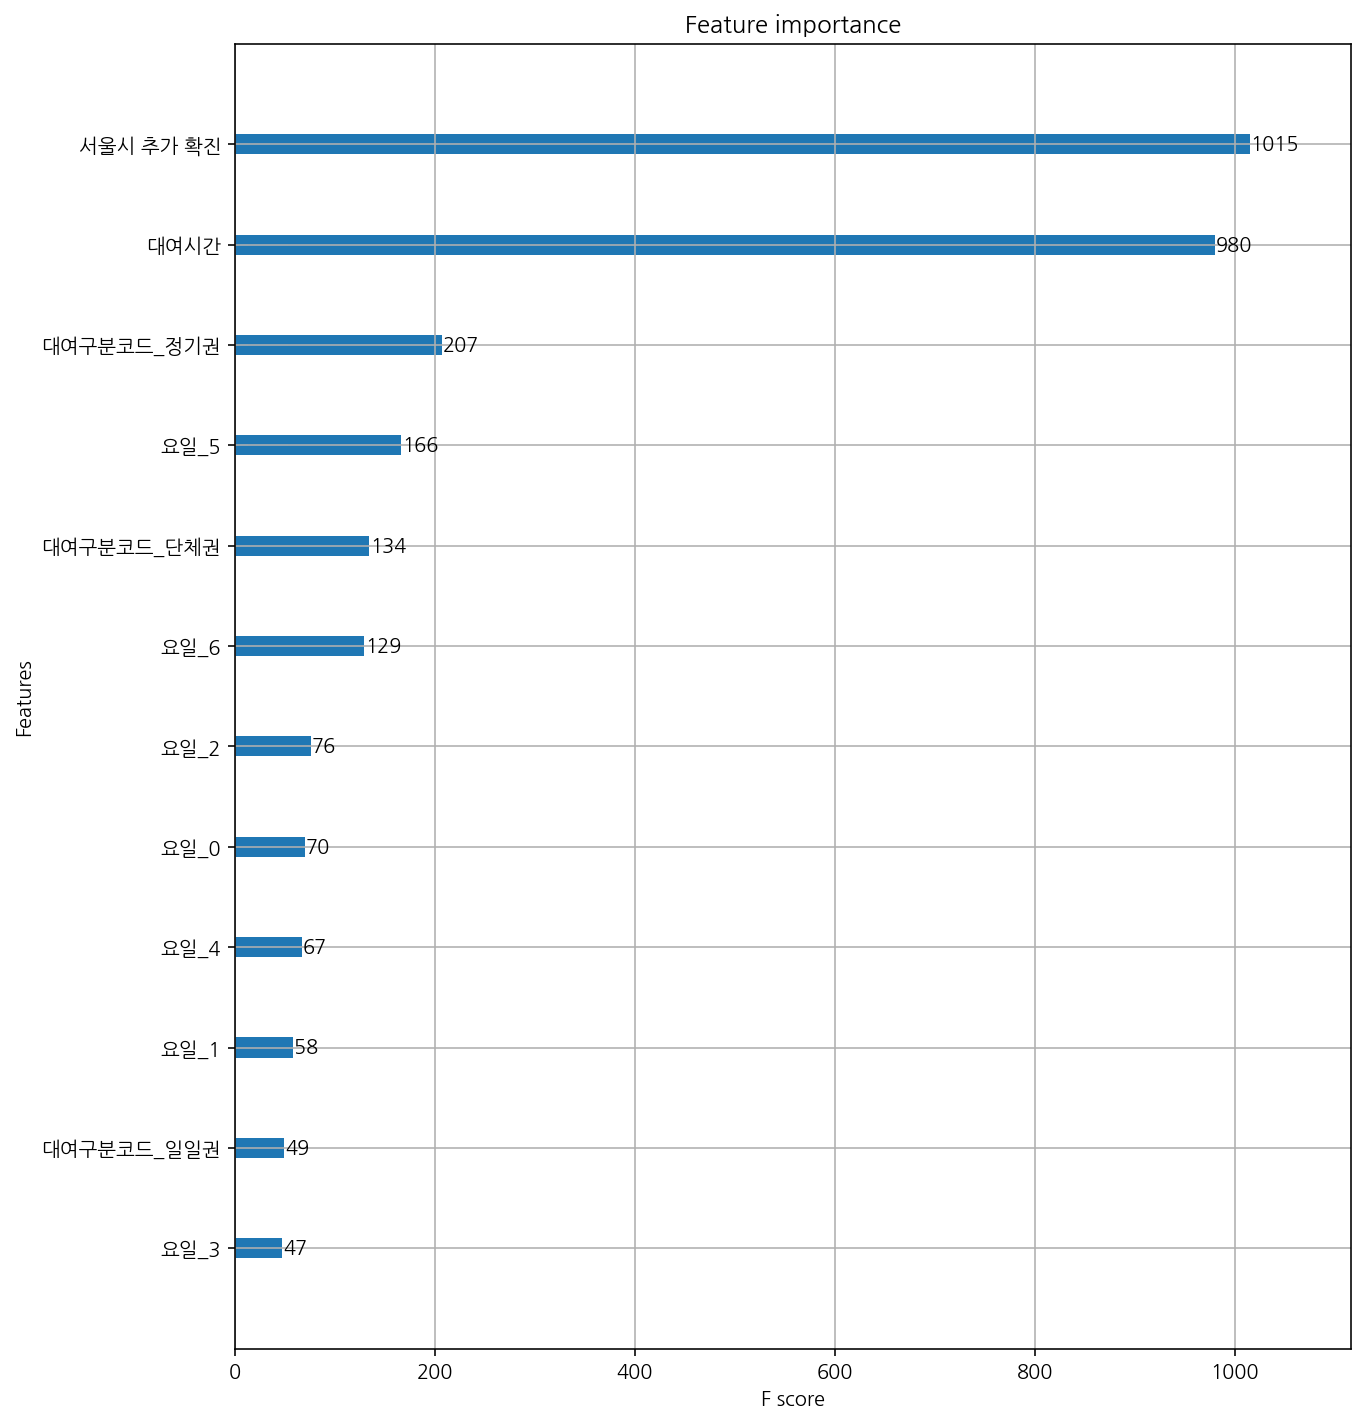

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

flg, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

# 최종 모델

시간 관계상 모든 서울특별시 자치구의 데이터들을 모델로 만들어 학습시키는 것이 안돼서 이용건수의 합계가 가장 많은 **강서구와 영등포구, 송파구 데이터**를 통해 예측

앞의 과정과 똑같이 데이터셋 설정

In [ ]:
top3 = ['강서구','영등포구','송파구']
df_top3 = df_1[df_1['소재지(자치구)'].isin(top3)]
df_top3.shape

(24172, 7)

In [ ]:
df_top3_onehot = pd.get_dummies(data = df_top3, columns = ['대여구분코드','요일','소재지(자치구)'], prefix = ['대여구분코드','요일','소재지(자치구)'])
print(df_top3_onehot.shape)
df_top3_onehot.head()

(24172, 17)


,날짜,대여시간,서울시 추가 확진,이용건수,대여구분코드_단체권,대여구분코드_일일권,대여구분코드_정기권,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6,소재지(자치구)_강서구,소재지(자치구)_송파구,소재지(자치구)_영등포구
148,2020-07-01,0,9,12,0,1,0,0,0,1,0,0,0,0,1,0,0
149,2020-07-01,0,9,46,0,0,1,0,0,1,0,0,0,0,1,0,0
150,2020-07-01,1,9,9,0,1,0,0,0,1,0,0,0,0,1,0,0
151,2020-07-01,1,9,30,0,0,1,0,0,1,0,0,0,0,1,0,0
152,2020-07-01,2,9,12,0,0,1,0,0,1,0,0,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_top3_onehot, test_size=0.2, random_state=2)
train.shape,test.shape

((19337, 17), (4835, 17))

In [ ]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=2)
train.shape, val.shape,test.shape

((15469, 17), (3868, 17), (4835, 17))

In [ ]:
target = '이용건수'
features = df_top3_onehot.drop(columns=[target,'날짜']).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

XGBoost 모델에 아까 나온 최적값을 사용하여 바로 학습

In [ ]:
xgb_model = xgboost.XGBRegressor(n_estimators=100,gamma=0, max_depth=5)

xgb_model.fit(X_train,y_train)
print("validation sets accuracy : ",xgb_model.score(X_val,y_val))  #0.819697613350705
print("test sets accuracy : ",xgb_model.score(X_test,y_test))  #0.8076096413890779

[03:58:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
validation sets accuracy :  0.819697613350705
test sets accuracy :  0.8076096413890779


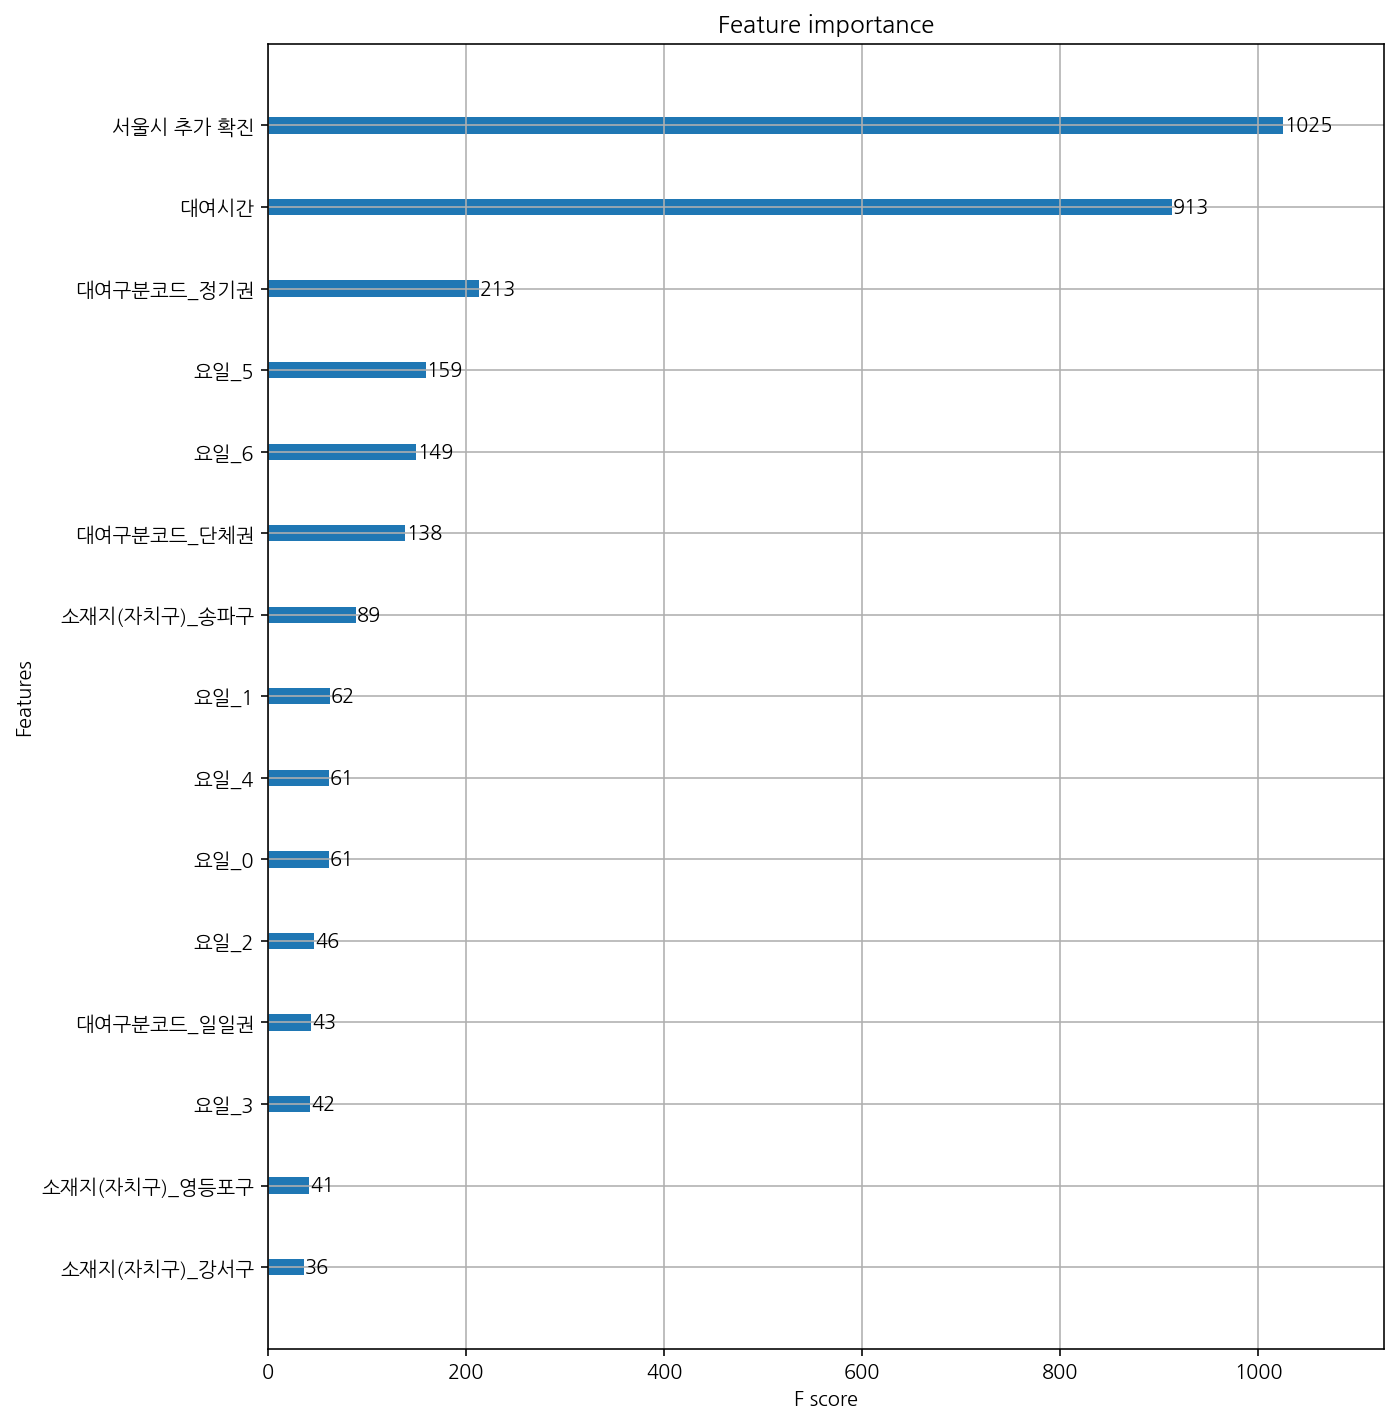

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

flg, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

## 시각화 및 특성들과 예측값의 관계

PDP 및 SHAP를 통한 예측값 및 각 특성이 미친 예측값에 대한 영향 정도 알아보기

In [ ]:
row = X_test.iloc[[200]]
row

,대여시간,서울시 추가 확진,대여구분코드_단체권,대여구분코드_일일권,대여구분코드_정기권,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6,소재지(자치구)_강서구,소재지(자치구)_송파구,소재지(자치구)_영등포구
127874,3,31,0,1,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
y_test.iloc[[200]]

127874    5
Name: 이용건수, dtype: int64

In [ ]:
xgb_model.predict(row)

array([6.5643873], dtype=float32)

In [ ]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

대여시간과 타겟(이용건수) 관계 :

주로 출근시간인 8-10시 사이, 오후 3-8시 사이에 이용건수가 높게 나온다

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


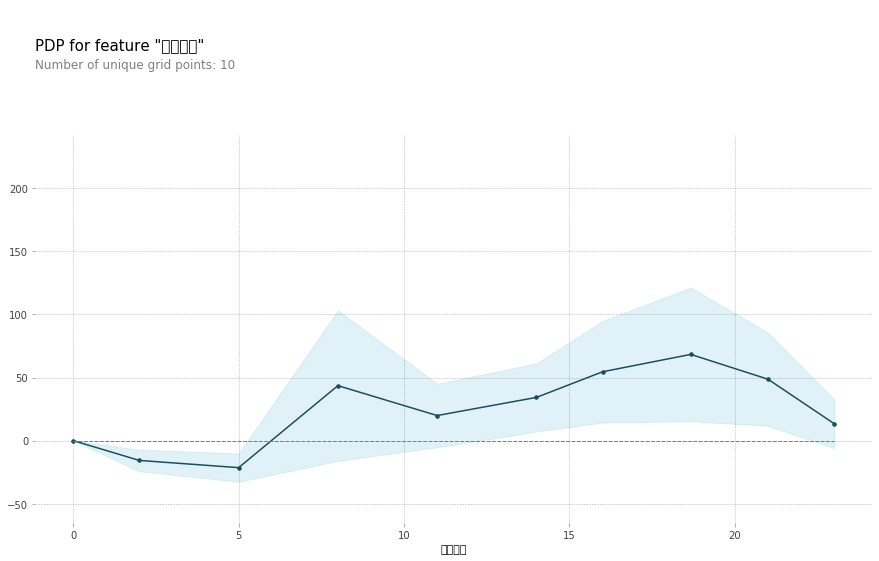

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = '대여시간'

isolated = pdp_isolate(
    model=xgb_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

정기권, 단체권, 일일권에 따른 타겟과의 관계 :
정기권과 일일권은 양의 영향을 끼친 것에 반해 단체권은 음의 영향. 코로나 확진자 수가 늘어나면 단체 행동에 제약이 생기는 것과 관련되어 있지 않을까 생각됨

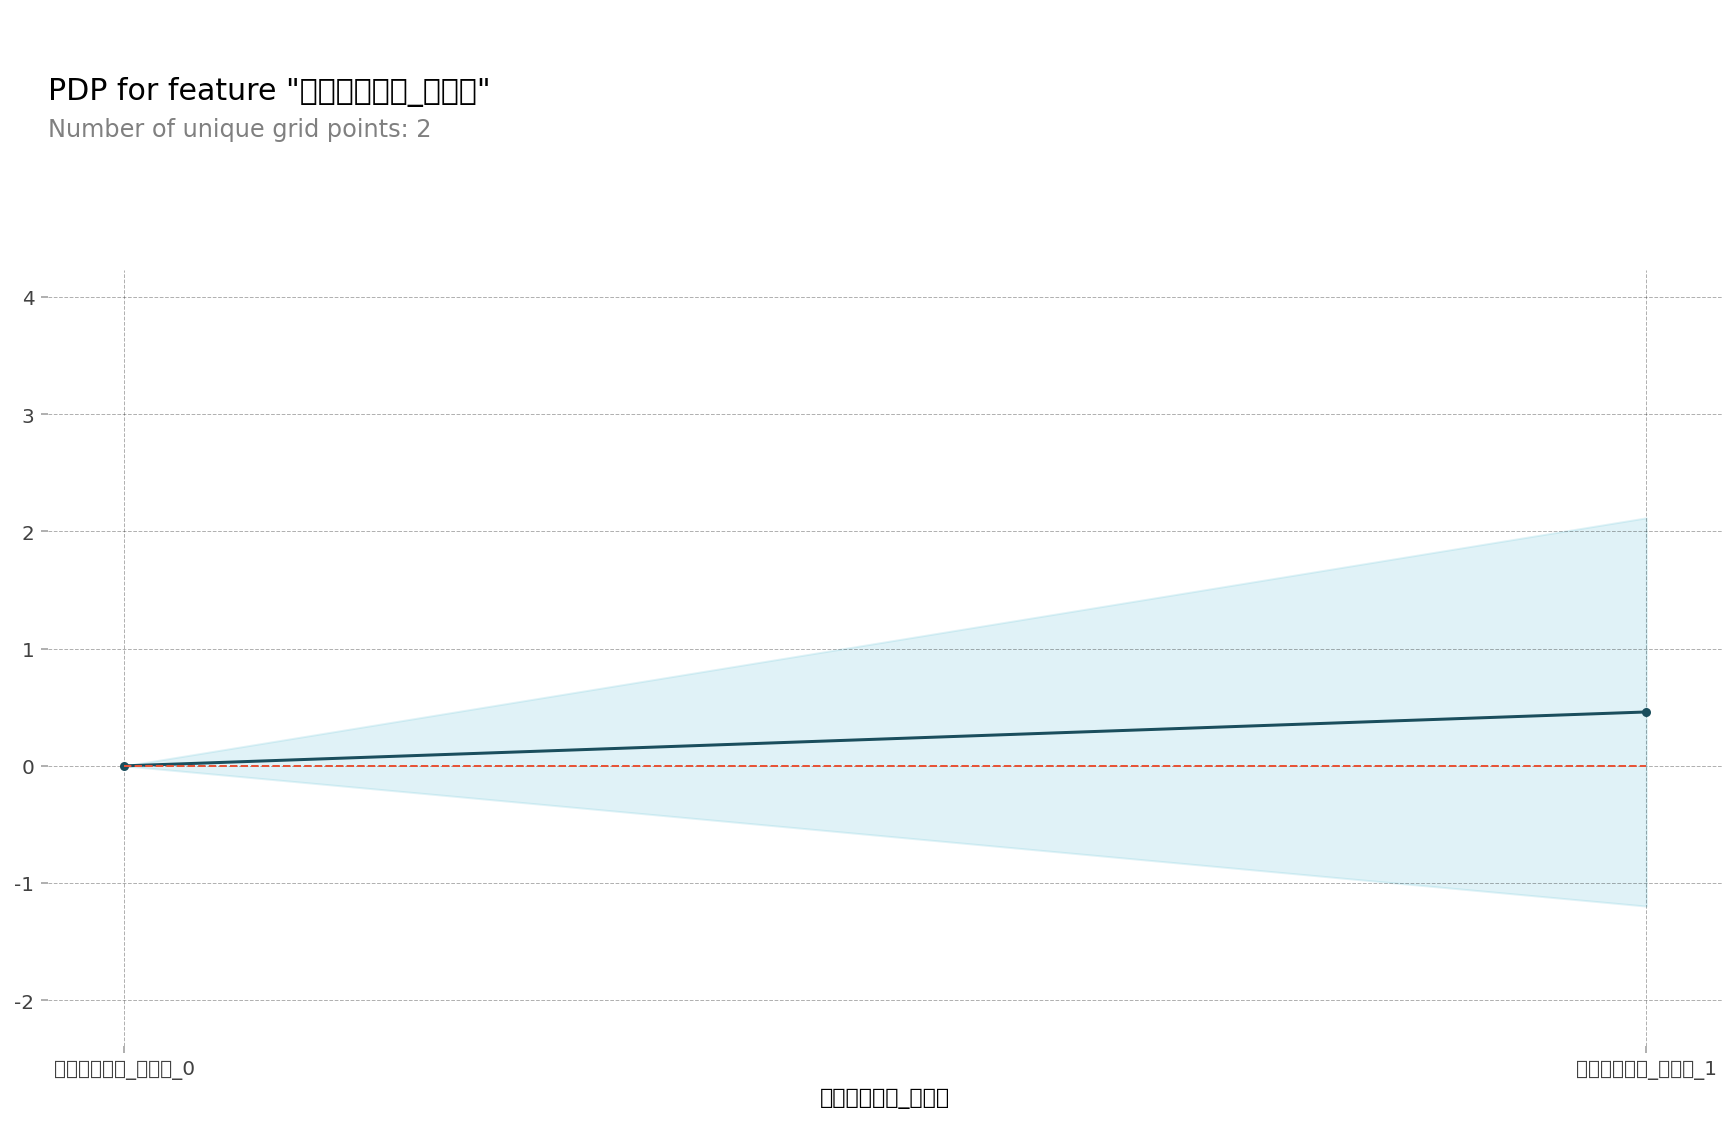

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = '대여구분코드_일일권'

isolated = pdp_isolate(
    model=xgb_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

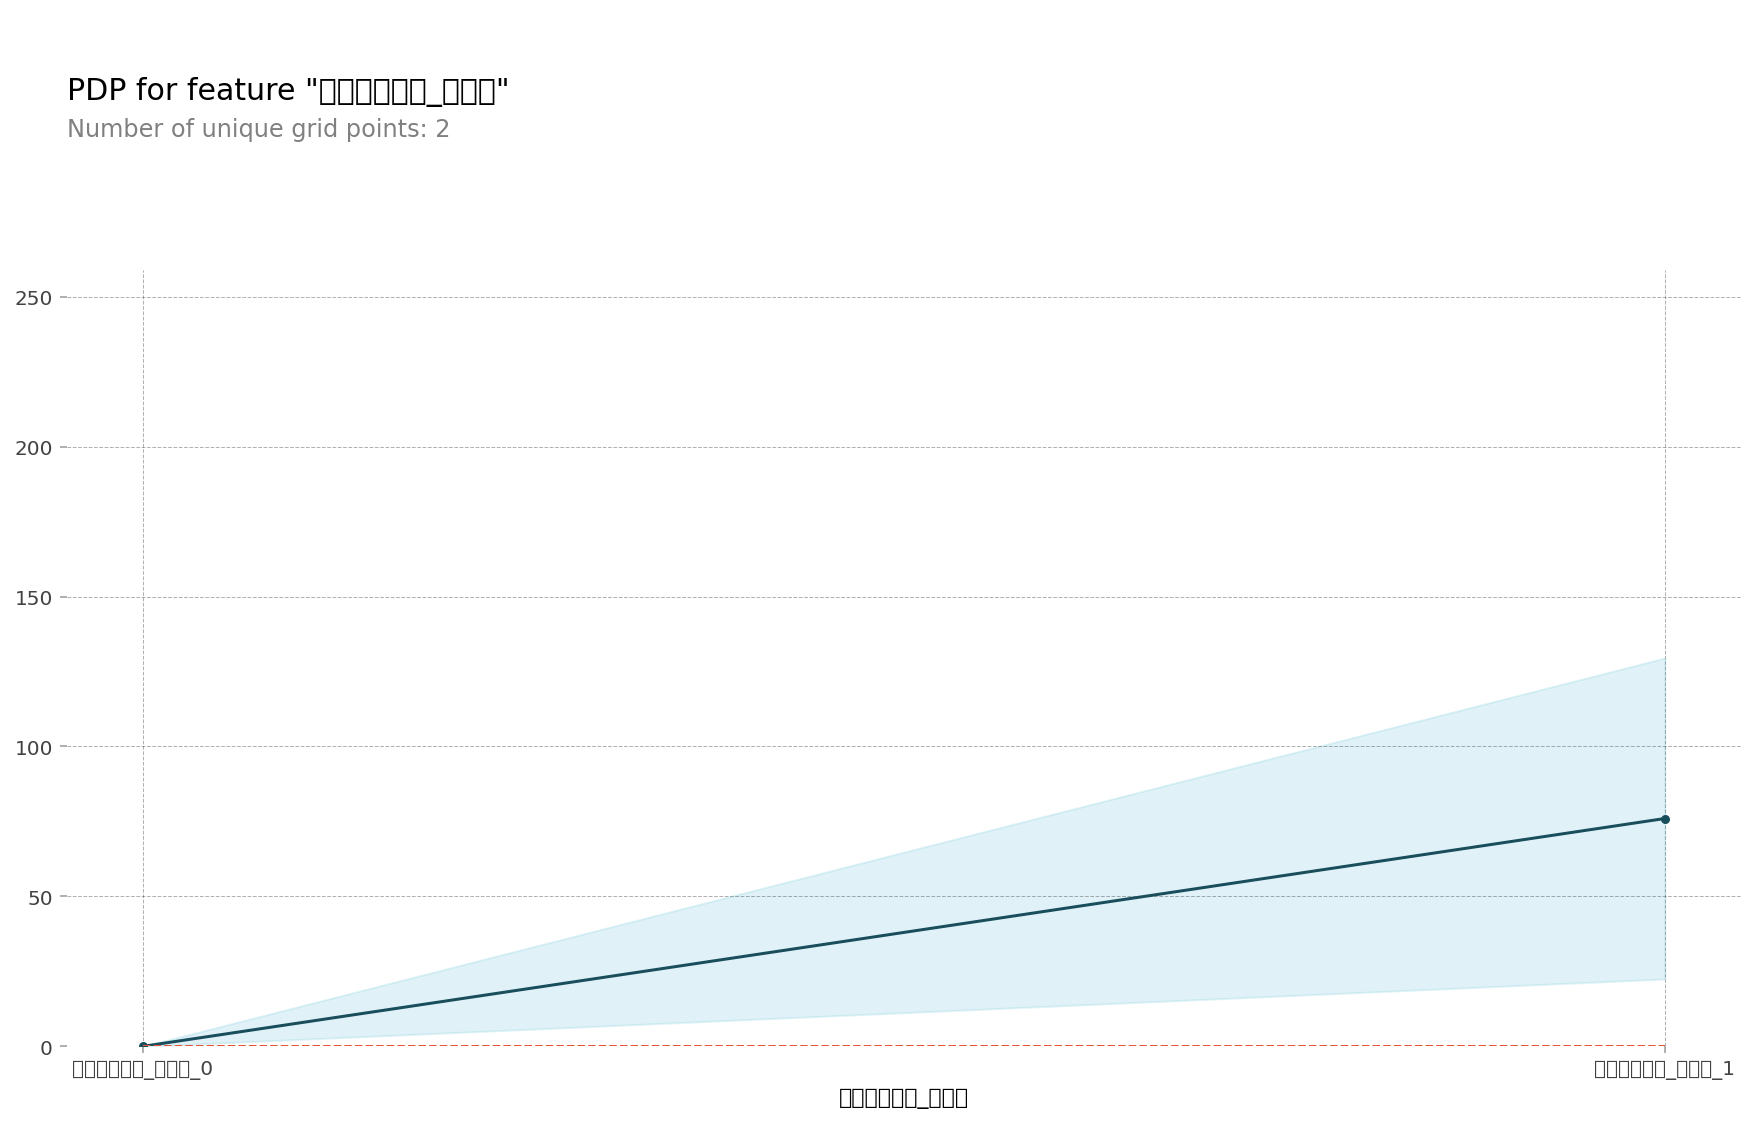

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = '대여구분코드_정기권'

isolated = pdp_isolate(
    model=xgb_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

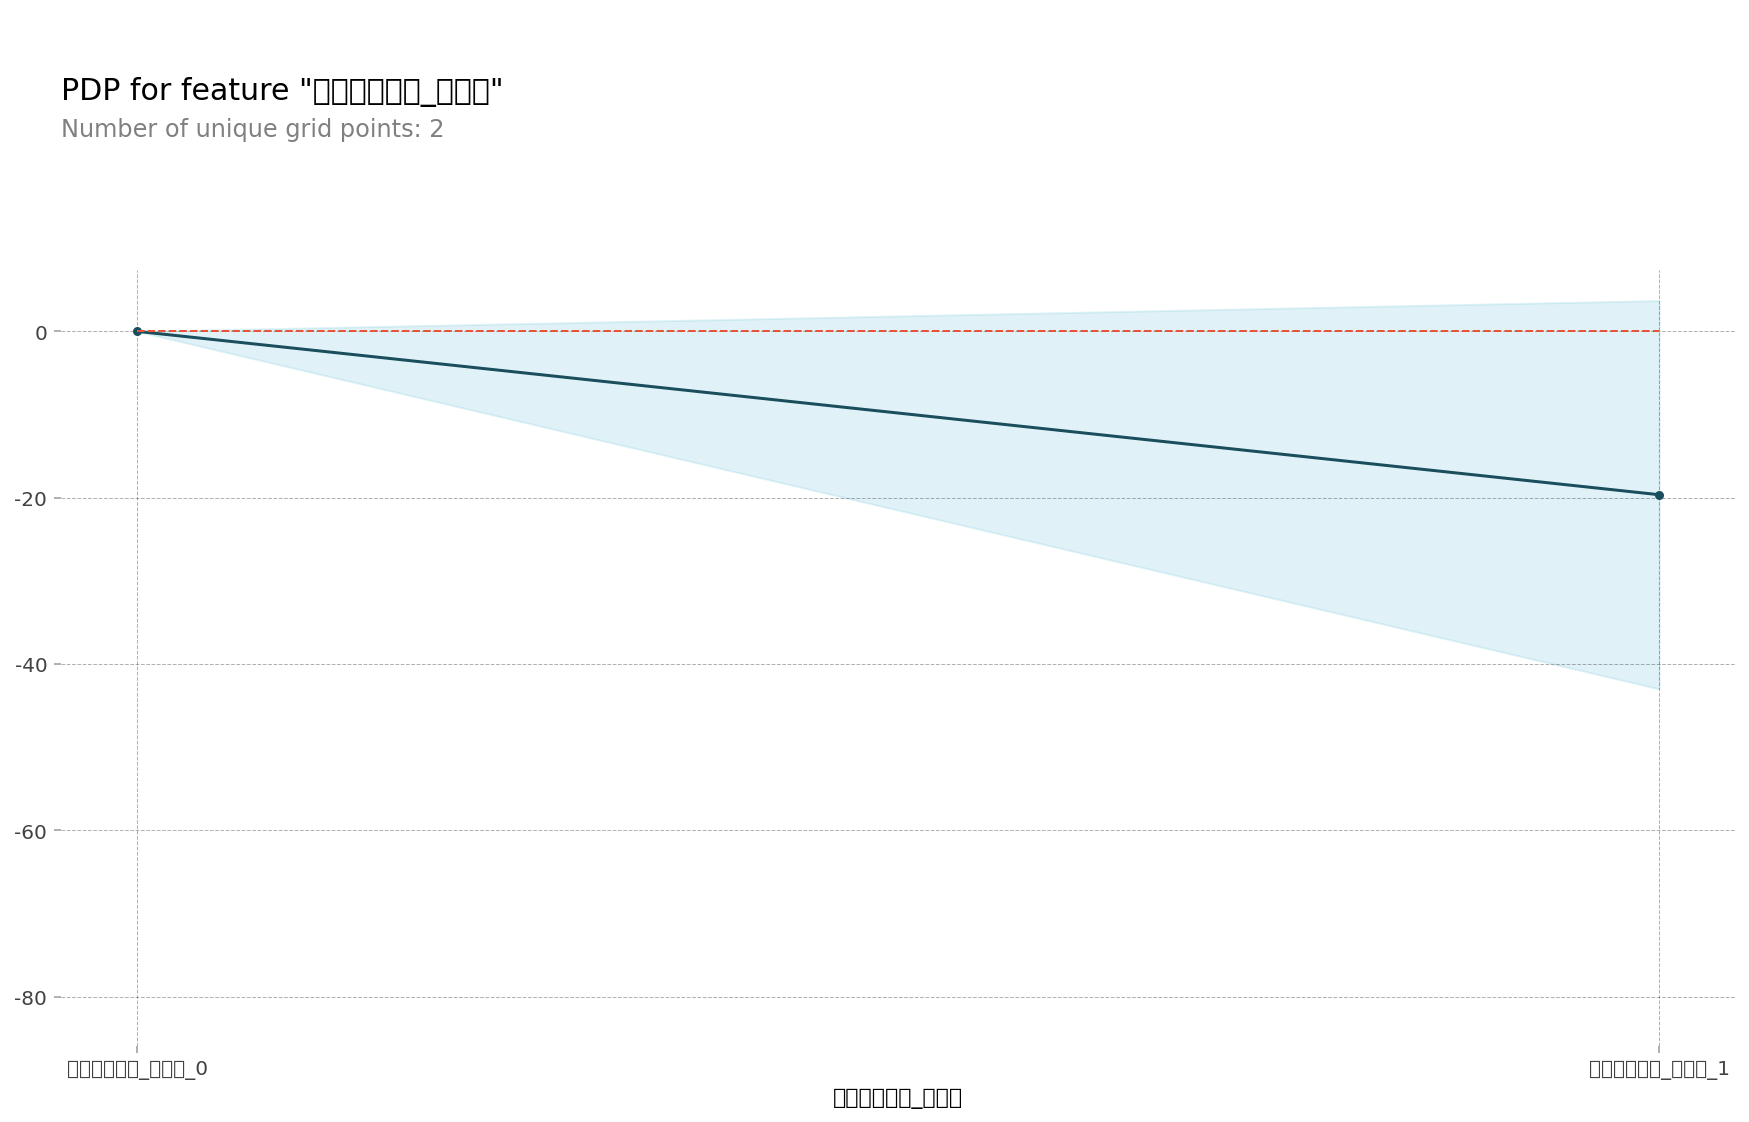

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = '대여구분코드_단체권'

isolated = pdp_isolate(
    model=xgb_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);